In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import ensemble
from sklearn import linear_model
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.linear_model import LinearRegression

In [48]:
regressiondf = pd.read_csv('cleanlisting1.csv')
regressiondf.head()
#regressiondf['price'] = regressiondf['price'].map(lambda p: int(p[1:-3].replace(",", "")))

,id,xl_picture_url,host_id,host_name,host_response_rate,host_total_listings_count,neighbourhood_cleansed,city,state,zipcode,...,reviews_per_month,TV,Kitchen,Internet,Pets,Heating,Air Conditioning,Washer,Dryer,ScoredRating
0,12147973.0,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,Virginia,0.0,1.0,Roslindale,boston,MA,2131.0,...,0.00,0,1,1,1,1,1,1,1,0
1,3075044.0,https://a1.muscache.com/im/pictures/39327812/d...,2572247,Andrea,100.0,1.0,Roslindale,boston,MA,2131.0,...,1.30,0,1,1,1,1,1,1,1,1
2,6976.0,https://a2.muscache.com/im/pictures/6ae8335d-9...,16701,Phil,100.0,1.0,Roslindale,boston,MA,2131.0,...,0.47,0,1,1,1,1,1,1,1,1
3,7651065.0,https://a1.muscache.com/im/pictures/97154760/8...,15396970,Linda,100.0,1.0,Roslindale,boston,MA,2131.0,...,2.25,0,1,1,1,1,1,1,1,1
4,12386020.0,https://a2.muscache.com/im/pictures/930c78b2-f...,64200298,Deborah,100.0,2.0,Roslindale,boston,MA,2131.0,...,1.70,0,1,1,1,1,1,1,1,1


In [49]:
for tf_feature in ['host_is_superhost', 'instant_bookable']:
    regressiondf[tf_feature] = regressiondf[tf_feature].map(lambda s: False if s == "f" else True)

In [53]:
for categorical_feature in ['neighbourhood_cleansed', 'cancellation_policy','room_type','instant_bookable','host_is_superhost']:
#     features=regressiondf
    features = pd.concat([features, pd.get_dummies(regressiondf[categorical_feature])], axis=1)
features.head()

,id,xl_picture_url,host_id,host_name,host_response_rate,host_total_listings_count,neighbourhood_cleansed,city,state,zipcode,...,no_refunds,strict,super_strict_30,Entire home/apt,Private room,Shared room,False,True,False,True
0,12147973.0,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,Virginia,0.0,1.0,Roslindale,boston,MA,2131.0,...,0,0,0,1,0,0,1,0,1,0
1,3075044.0,https://a1.muscache.com/im/pictures/39327812/d...,2572247,Andrea,100.0,1.0,Roslindale,boston,MA,2131.0,...,0,0,0,0,1,0,0,1,1,0
2,6976.0,https://a2.muscache.com/im/pictures/6ae8335d-9...,16701,Phil,100.0,1.0,Roslindale,boston,MA,2131.0,...,0,0,0,0,1,0,1,0,0,1
3,7651065.0,https://a1.muscache.com/im/pictures/97154760/8...,15396970,Linda,100.0,1.0,Roslindale,boston,MA,2131.0,...,0,0,0,0,1,0,1,0,0,1
4,12386020.0,https://a2.muscache.com/im/pictures/930c78b2-f...,64200298,Deborah,100.0,2.0,Roslindale,boston,MA,2131.0,...,0,0,0,0,1,0,1,0,0,1


In [55]:
for col in features.columns[features.isnull().any()]:
    print(col)

for col in features.columns[features.isnull().any()]:
    features[col] = features[col].fillna(features[col].median())

In [68]:
regressiondf = regressiondf[[
    "accommodates", "price", "accommodates" , "beds" ,"neighbourhood_cleansed",   "room_type", 
    "cancellation_policy", "instant_bookable", "reviews_per_month", "number_of_reviews","zipcode",
            "review_scores_rating",  "ScoredRating", "property_type",  "bathrooms" ,"beds" ,"host_is_superhost", "TV" ,
            "Internet", "Kitchen"]]

regressiondf.head()




,accommodates,accommodates,price,accommodates,accommodates,beds,beds,neighbourhood_cleansed,room_type,cancellation_policy,...,review_scores_rating,ScoredRating,property_type,bathrooms,beds,beds,host_is_superhost,TV,Internet,Kitchen
0,4.0,4.0,250.0,4.0,4.0,3.0,3.0,Roslindale,Entire home/apt,moderate,...,0,0,House,1.5,3.0,3.0,False,0,1,1
1,2.0,2.0,65.0,2.0,2.0,1.0,1.0,Roslindale,Private room,moderate,...,5,1,Apartment,1.0,1.0,1.0,False,0,1,1
2,2.0,2.0,65.0,2.0,2.0,1.0,1.0,Roslindale,Private room,moderate,...,5,1,Apartment,1.0,1.0,1.0,True,0,1,1
3,2.0,2.0,79.0,2.0,2.0,2.0,2.0,Roslindale,Private room,flexible,...,5,1,House,1.5,2.0,2.0,True,0,1,1
4,2.0,2.0,75.0,2.0,2.0,1.0,1.0,Roslindale,Private room,flexible,...,5,1,Condominium,1.0,1.0,1.0,True,0,1,1


In [78]:
features = regressiondf[[ 'accommodates', 
                     'bathrooms',  'beds', 'price',  'number_of_reviews',
                     'review_scores_rating', "number_of_reviews",'TV' ,
            "Internet", "Kitchen"]]

In [79]:
for categorical_feature in ['neighbourhood_cleansed', 'property_type','cancellation_policy',
                            'room_type','instant_bookable','host_is_superhost']:
  
    features = pd.concat([features, pd.get_dummies(regressiondf[categorical_feature])], axis=1)
    
features.head()

,accommodates,accommodates,accommodates,accommodates,bathrooms,beds,beds,beds,beds,price,...,no_refunds,strict,super_strict_30,Entire home/apt,Private room,Shared room,False,True,False,True
0,4.0,4.0,4.0,4.0,1.5,3.0,3.0,3.0,3.0,250.0,...,0,0,0,1,0,0,1,0,1,0
1,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,65.0,...,0,0,0,0,1,0,0,1,1,0
2,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,65.0,...,0,0,0,0,1,0,1,0,0,1
3,2.0,2.0,2.0,2.0,1.5,2.0,2.0,2.0,2.0,79.0,...,0,0,0,0,1,0,1,0,0,1
4,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,75.0,...,0,0,0,0,1,0,1,0,0,1


In [80]:
for col in features.columns[features.isnull().any()]:
    print(col)

In [91]:
features.to_csv("predictionfeatures.csv", index=None)
print("csv created")
print(features.shape)

csv created
(34590, 299)


In [81]:
for col in features.columns[features.isnull().any()]:
    features[col] = features[col].fillna(features[col].median())

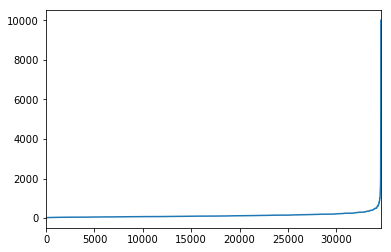

In [82]:
features['price'].sort_values().reset_index(drop=True).plot()

In [101]:
from sklearn.linear_model import LinearRegression 
    
    
fitters = features.query('price <= 600')

In [97]:
clf = LinearRegression()
y = features['price']
clf.fit(fitters.drop('price', axis='columns'), y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [98]:
#regression
clf = LinearRegression()
y = fitters['price']
clf.fit(fitters.drop('price', axis='columns'), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [105]:
y_pred = clf.predict(fitters.drop('price', axis='columns'))
import sklearn.metrics

# MSE is the square of the average error in each term, while root MSE is its absolute value.

In [103]:
mse = sklearn.metrics.mean_squared_error(y, y_pred)
mse

3223.1131182199133

In [104]:
root_mse = mse**(1/2)
root_mse



1.0

# Our RMSE is 1.0 dollars, : meaning that our classifier is wrong by that much on average. So its less HEnce out model is fine

How significant is this with respect to the range of prices we are seeing? To see that let's plot RMSE as a boundary around the median price.

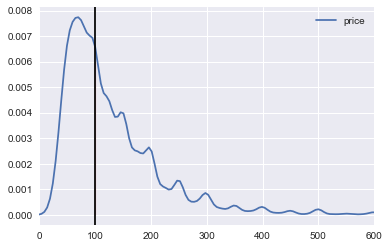

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

sns.kdeplot(y)
ax = plt.gca()
ax.set_xlim([0, 600])
plt.axvline(y.median(), c='
            black')
ax.add_patch(
    patches.Rectangle((y.median() - root_mse, 0), 2*root_mse, 0.006,
                      color='red', alpha=0.2)
)

In [78]:
r_squared = sklearn.metrics.r2_score(y, y_pred)
r_squared

0.58005177660573826

In [79]:
#effect of neighbourhood

# coefs = list(zip(clf.coef_, fitters.drop('price', axis='columns')))
# coefs


# neighborhoods = np.unique(regressiondf['neighbourhood_cleansed'])
# neighborhood_effects = [v for v in coefs if v[1] in neighborhoods]

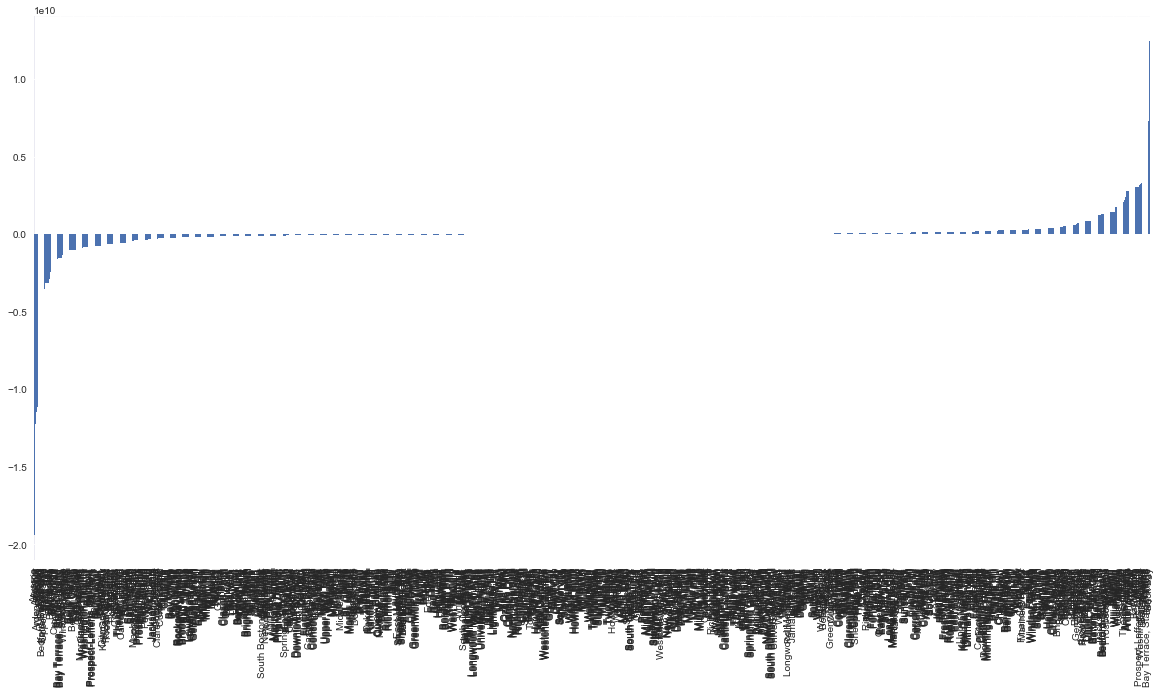

In [80]:

# plt.figure(figsize=(20,10))

# pd.Series(data=[n[0] for n in neighborhood_effects],
#           index=[n[1] for n in neighborhood_effects])\
#     .sort_values()\
#     .plot(kind='bar')


